# # 그래프 표현
- 인접 행렬
- 인접 리스트

# # 깊이 우선 탐색(DFS; 인접 행렬) - 스택

In [5]:
# DFS 함수 정의
def DFS(vtx, adj, s, visited):
    # 현재 정점을 방문 처리하고 출력
    visited[s] = True
    print(vtx[s], end=' ')
    # 인접한 모든 정점을 탐색
    for v in range(len(vtx)):
        if adj[s][v] != 0:
            if visited[v]== False:
                DFS(vtx, adj, v, visited)



In [6]:
# 테스트
if __name__ == "__main__":
    # 테스트용 데이터
    vtx = ['U', 'V', 'W', 'X', 'Y']  # 정점 리스트
    edge = [
        [0, 1, 1, 0, 0],  # U와 인접한 정점들
        [1, 0, 1, 1, 0],  # V와 인접한 정점들
        [1, 1, 0, 0,1],  # W와 인접한 정점들
        [0, 1, 0, 0, 0],  # X와 인접한 정점들
        [0, 0, 1, 0, 0]   # Y와 인접한 정점들
    ]  # 인접 행렬

    # 방문 여부 리스트 초기화
    visited = [False] * len(vtx)

    # DFS 실행 및 테스트
    print("DFS(출발점: U): ", end="")
    DFS(vtx, edge, 0, visited)  # U 정점에서 시작
    print()  # 줄바꿈


DFS(출발점: U): U V W Y X 


# # 너비 우선 탐색(인접리스트) - 큐

In [7]:
# BFS 함수 정의
from queue import Queue

def BFS_AL(vtx, aList, s):
    n = len(vtx)
    visited = [False]* n
    Q = Queue() # Queue 생성
    Q.put(s)
    visited[s] = True

    while not Q.empty():
        s = Q.get()
        print(vtx[s], end=" ")

        for v in aList[s]:
            if not visited[v]:
                Q.put(v)
                visited[v]= True

In [8]:

# 테스트
if __name__ == "__main__":
    # 정점 리스트와 인접 리스트 정의
    vtx = ['U', 'V', 'W', 'X', 'Y']
    aList = [
        [1, 2],   # U와 연결된 정점들
        [0, 3],   # V와 연결된 정점들
        [0, 3, 4],# W와 연결된 정점들
        [1, 2],   # X와 연결된 정점들
        [2]       # Y와 연결된 정점들
    ]

    # BFS 실행 및 테스트
    print("BFS(출발점: U): ", end="")
    BFS_AL(vtx, aList, 0)  # U 정점에서 BFS 시작
    print()  # 줄바꿈

BFS(출발점: U): U V W X Y 


# # 신장트리
- DFS을 이용한 신장트리 (인접행렬)

In [9]:
# DFS를 이용한 신장 트리 생성 함수 정의
def ST_DFS(vtx, adj, s, visited):
    visited[s] = True  # 현재 정점을 방문 처리

    # 인접한 모든 정점을 탐색
    for v in range(len(vtx)):
        if adj[s][v] != 0:  # s와 v가 연결되어 있는 경우
            if not visited[v]:  # v가 방문되지 않았다면
                print("(", vtx[s], vtx[v], ")", end=' ')  # 간선을 출력
                ST_DFS(vtx, adj, v, visited)  # v를 시작점으로 DFS 재귀 호출


In [10]:
# 테스트
if __name__ == "__main__":
    # 정점 리스트와 인접 행렬 정의
    vtx = ['U', 'V', 'W', 'X', 'Y']
    adj = [
        [0, 1, 1, 0, 0],  # U와 연결된 정점들
        [1, 0, 0, 1, 0],  # V와 연결된 정점들
        [1, 0, 0, 1, 1],  # W와 연결된 정점들
        [0, 1, 1, 0, 0],  # X와 연결된 정점들
        [0, 0, 1, 0, 0]   # Y와 연결된 정점들
    ]

    # 방문 여부 리스트 초기화
    visited = [False] * len(vtx)

    # 신장 트리 생성 및 출력
    print("ST_DFS_AM: ", end="")
    ST_DFS(vtx, adj, 0, visited)  # U 정점에서 시작
    print()  # 줄바꿈

ST_DFS_AM: ( U V ) ( V X ) ( X W ) ( W Y ) 


# # Prim 알고리즘: Monday!!

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# 상수 정의
INF = 999

# 초기 그래프와 가중치를 시각화하는 함수
def draw_initial_graph(vertex, adj):
    G = nx.Graph()
    for i in range(len(vertex)):
        for j in range(i + 1, len(vertex)):
            if adj[i][j] != INF:
                G.add_edge(vertex[i], vertex[j], weight=adj[i][j])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=500, font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)})
    plt.title("Initial Graph with Weights")
    plt.show()

def draw_graph(vertex, adj):
    # NetworkX 그래프 생성
    G = nx.Graph()
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)

    # 그래프 그리기
    pos = nx.spring_layout(G)  # 노드 위치 설정
    plt.figure(figsize=(6, 4))

    # MST의 간선을 파란색으로 표시하고 가중치를 추가
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{weight}' for u, v, weight in edges})
    plt.title("Prim's MST Graph")
    plt.show()

# MST에 포함되지 않은 정점 중 최소 거리(dist)를 가지는 정점을 찾는 함수
def getMinVertex(dist, selected):
    minv = 0
    mindist = INF
    for v in range(len(dist)):
        if not selected[v] and dist[v] < mindist:
            mindist = dist[v] 
            minv = v
    return minv

# Prim 알고리즘을 사용하여 최소 신장 트리(MST)를 생성하고, 간선 리스트와 최소 비용을 반환하는 함수
def MSTPrim(vertex, adj):
    n = len(vertex)
    dist =  [INF] * n
    dist[0] = 0 
    
    selected = [False] * n
    parent = [-1] * n #각 정점의 부모를 저장하여 MST의 간선 추적

    for _ in range(n):
        u = getMinVertex(dist, selected)
        selected[u] = True
        print(vertex[u], end =' ') #선택된 정점을 출력
        
        #선택된 정점 u와 연결된 모든 정점 v에 대해 가중치 간선화
        for v in range(n):
            if adj[u][v] != INF and not selected[v]:
                if adj[u][v] < dist[v]:
                    dist[v] = adj[u][v] #가넌의 가중치 업데이트
                    parent[v] = u #u를 v의 부모로 설정
        print(": ", dist) #중간 결과로 dist 배열 출력

    # MST의 간선 리스트 생성 및 최소 비용 계산
    edges = []
    total_cost = 0
    for  i in range(1, n):
        if parent[i] != -1:
            edges.append((vertex[parent[i]], vertex[i], adj[parent[i]][i]))
            total_cost+= adj[parent[i]][i]

    return edges, total_cost



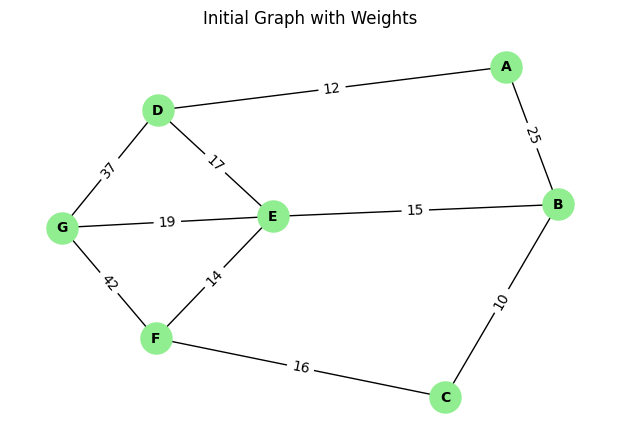

Prim 알고리즘에 의해 생성된 MST:
A :  [0, 25, 999, 12, 999, 999, 999]
D :  [0, 25, 999, 12, 17, 999, 37]
E :  [0, 15, 999, 12, 17, 14, 19]
F :  [0, 15, 16, 12, 17, 14, 19]
B :  [0, 15, 10, 12, 17, 14, 19]
C :  [0, 15, 10, 12, 17, 14, 19]
G :  [0, 15, 10, 12, 17, 14, 19]

MST 간선 리스트: [('E', 'B', 15), ('B', 'C', 10), ('A', 'D', 12), ('D', 'E', 17), ('E', 'F', 14), ('E', 'G', 19)]
최소 비용: 87


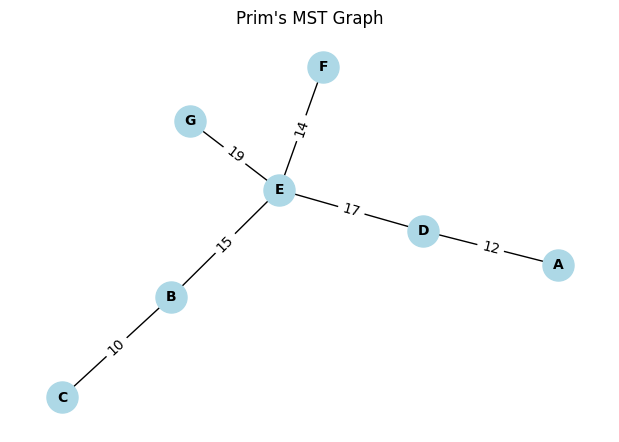

In [14]:
# 예제 그래프로 함수 테스트
if __name__ == "__main__":
    # 정점 리스트와 가중치 인접 행렬 정의
    vertex = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    adj = [
        [INF, 25, INF, 12, INF, INF, INF],  # A
        [25, INF, 10, INF, 15, INF, INF],   # B
        [INF, 10, INF, INF, INF, 16,INF],  # C
        [12, INF, INF, INF, 17, INF, 37],   # D
        [INF, 15, INF, 17, INF, 14, 19],    # E
        [INF, INF, 16, INF, 14, INF, 42],   # F
        [INF, INF, INF, 37, 19, 42, INF]    # G
    ]

    # 초기 그래프 시각화
    draw_initial_graph(vertex, adj)

    # Prim 알고리즘을 사용하여 MST 생성
    print("Prim 알고리즘에 의해 생성된 MST:")
    edges, total_cost = MSTPrim(vertex, adj)
    print("\nMST 간선 리스트:", edges)
    print("최소 비용:", total_cost)

    # NetworkX 그래프 생성
    draw_graph(vertex, edges)

# #. Min Heap 자료구조

In [27]:
import heapq

# 빈 리스트를 힙으로 초기화
min_heap = []

# heapq.heappush를 사용하여 새로운 요소를 추가
heapq.heappush(min_heap, 5) # 5(정점)
heapq.heappush(min_heap, 3) # 5, 3        -> 3(정점), 5(왼쪽노드)   
heapq.heappush(min_heap, 8) # 3, 5, 8     -> 3(정점), 5(왼), 8(오)
heapq.heappush(min_heap, 1) # 3, 5, 8, 1  -> 3(정점), 5(왼), 8(오), 1(5의 왼쪽 자식노드) -> 3(정), 1(왼), 8(오), 5(손자) -> 1(정), 3(왼), 8(오), 5(손자)

print("힙 상태:", min_heap)  # [1, 3, 8, 5] 형태로 최소 힙 구조가 유지.

# 최소값을 삭제하려면 heapq.heappop를 사용
min_value = heapq.heappop(min_heap)
print("삭제된 최소값:", min_value)  # 1
print("삭제 후 힙 상태:", min_heap)  # [3, 5, 8] 형태로 재정렬됩니다.



힙 상태: [1, 3, 8, 5]
삭제된 최소값: 1
삭제 후 힙 상태: [3, 5, 8]


# # Prim 알고리즘의 성능 개선
- 최소 힙(Min-Heap)을 사용하여 코드에서 가장 작은 가중치를 가진 간선을 더 효율적으로 찾도록 수정할 수 있다.
-  heapq 라이브러리를 이용하여 최소 힙을 구현하고,
- 이를 통해 시간 복잡도를 O(E log V)로 줄일 수 있다.
- 아래는 최소 힙을 사용하여 Prim 알고리즘을 구현한 코드입니다.

In [34]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# 상수 정의
INF = 999

# 초기 그래프와 가중치를 시각화하는 함수
def draw_initial_graph(vertex, adj):
    G = nx.Graph()
    for i in range(len(vertex)):
        for j in range(i + 1, len(vertex)):
            if adj[i][j] != INF:
                G.add_edge(vertex[i], vertex[j], weight=adj[i][j])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=500, font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)})
    plt.title("Initial Graph with Weights")
    plt.show()

def draw_graph(vertex, adj):
    # NetworkX 그래프 생성
    G = nx.Graph()
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)

    # 그래프 그리기
    pos = nx.spring_layout(G)  # 노드 위치 설정
    plt.figure(figsize=(6, 4))

    # MST의 간선을 파란색으로 표시하고 가중치를 추가
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{weight}' for u, v, weight in edges})
    plt.title("Prim's MST Graph")
    plt.show()

# Prim 알고리즘을 사용하여 최소 신장 트리(MST)를 생성하고, 간선 리스트와 최소 비용을 반환하는 함수
def MSTPrim(vertex, adj):
    n=len(vertex)
    dist = [INF] * n
    dist[0] = 0
    selected = [False] * n
    parent = [-1] * n # 각 정점의 부모를 저장하여 MST의 간선 추적
    min_heap = [(0, 0)] #(거리, 정점 인덱스) 쌍을 저장하는 최소 힙 초기화

    while min_heap:
        # 최소 힙에서 최솟값을 가지는 정점을 꺼냄
        current_dist, u = heapq.heappop(min_heap)

        if selected[u]: #이미 선택된 정점은 스킵
            continue

        selected[u] = True
        print(vertex[u], end= ' ') #선택된 정점을 출력

        #선택된 정점 u와 연결된 모든 정점 v에 대해 간선 가중치화 업데이트
        print(": ", dist) #선택된 정점을 출력
        for v in range(n):
            if adj[u][v] != INF and not selected[v] and adj[u][v] < dist[v]:
                dist[v] = adj[u][v]
                parent[v] = u
                heapq.heappush(min_heap, (dist[v], v)) #최소 힙에 추가

    # MST의 간선 리스 생성 및 최소 비용 계산
    edges = []
    total_cost = 0
    for i in range(1, n):
         if parent[i] != -1:
            edges.append((vertex[parent[i]], vertex[i], adj[parent[i]][i]))
            total_cost+= adj[parent[i]][i]
             
    return edges, total_cost

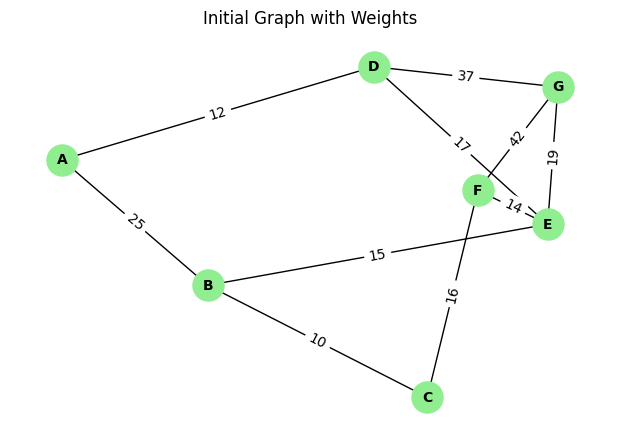

Prim 알고리즘에 의해 생성된 MST:
A :  [0, 999, 999, 999, 999, 999, 999]
D :  [0, 25, 999, 12, 999, 999, 999]
E :  [0, 25, 999, 12, 17, 999, 37]
F :  [0, 15, 999, 12, 17, 14, 19]
B :  [0, 15, 16, 12, 17, 14, 19]
C :  [0, 15, 10, 12, 17, 14, 19]
G :  [0, 15, 10, 12, 17, 14, 19]

MST 간선 리스트: [('E', 'B', 15), ('B', 'C', 10), ('A', 'D', 12), ('D', 'E', 17), ('E', 'F', 14), ('E', 'G', 19)]
최소 비용: 87


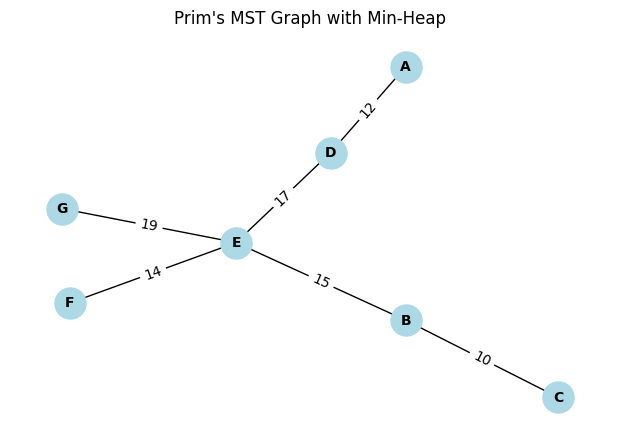

In [35]:
# 예제 그래프로 함수 테스트
if __name__ == "__main__":
    # 정점 리스트와 가중치 인접 행렬 정의
    vertex = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    adj = [
        [INF, 25, INF, 12, INF, INF, INF],  # A
        [25, INF, 10, INF, 15, INF, INF],   # B
        [INF, 10, INF, INF, INF, 16,INF],  # C
        [12, INF, INF, INF, 17, INF, 37],   # D
        [INF, 15, INF, 17, INF, 14, 19],    # E
        [INF, INF, 16, INF, 14, INF, 42],   # F
        [INF, INF, INF, 37, 19, 42, INF]    # G
    ]

    # 초기 그래프 시각화
    draw_initial_graph(vertex, adj)

    # Prim 알고리즘을 사용하여 MST 생성
    print("Prim 알고리즘에 의해 생성된 MST:")
    edges, total_cost = MSTPrim(vertex, adj)
    print("\nMST 간선 리스트:", edges)
    print("최소 비용:", total_cost)

    # NetworkX 그래프 생성
    G = nx.Graph()
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)

    # 그래프 그리기
    pos = nx.spring_layout(G)  # 노드 위치 설정
    plt.figure(figsize=(6, 4))

    # MST의 간선을 파란색으로 표시하고 가중치를 추가
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{weight}' for u, v, weight in edges})
    plt.title("Prim's MST Graph with Min-Heap")
    plt.show()